# Prueba mediciones en python

In [79]:
# Al instalar pandas se instala numpy
try:
    import pandas as pd
    import numpy as np
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'pandas'])
    import pandas as pd
    import numpy as np
    
#Es
try:
    import matplotlib.pyplot as plt
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'matplotlib'])
    import matplotlib.pyplot as plt

import random
from math import sqrt

###  Generador de letras aleatorias

In [80]:
valor_a = ord('a')
distancia_z_a = ord('z')-ord('a')


def genera_letra():
    import random
    return chr(valor_a+random.randint(0, distancia_z_a))


### Generador de ficheros de entrada

In [81]:

def generate_inputfile(problem_length: int, inputfilename: str="in.txt") -> None:
    input_file = open(inputfilename, 'w')
    prueba = ""
    # Generamos las subcadenas del problema
    for _ in range(3):
        # Generamos cada subcadena con 3 letras de longitud
        for _2 in range(3):
            prueba += genera_letra()
        # Escribimos la subcadena en el fichero de entrada
        input_file.write(prueba+"\n")
        prueba = ""

    for _ in range(problem_length):
        prueba += genera_letra()
    input_file.write(prueba)
    input_file.close()


## Intentando lanzar un programa c++ en python

In [82]:
def ejecutar(nombre_entrada: str = "in.txt", nombre_salida: str = "out.txt", problema: str = "it"):
    import subprocess
    import time
    import datetime
    
    fichero_entrada = open(nombre_entrada, "r")
    fichero_salida = open(nombre_salida, "w")
    # Obtener inicio de ejecución

    #tiempo_inicio = time.process_time()
    tiempo_inicio = datetime.time.now()
    # Ejecutar proceso
    proc = subprocess.Popen(["./solucion", problema], stdin=fichero_entrada, stdout=fichero_salida)    
    proc.wait()
    # Obtener final de ejecución
    #tiempo_final = time.process_time()
    tiempo_final = datetime.time.now()
    
    # Cerrar ficheros de i/o
    fichero_entrada.close()
    fichero_salida.close()
    
    return (tiempo_final-tiempo_inicio)*1000


In [83]:
import time
it_out = "iterativa.txt"
dyv_out = "dyv.txt"


def tiempo_en_milis():
    return round(time.time() * 1000)


def pruebas(nombre_entrada: str = "in.txt", inicio: int = 100,
            final: int = 10000, salto: int = 1) -> pd.DataFrame:
    import subprocess
    df: pd.DataFrame = pd.DataFrame(
        columns=['tamanno', 'it_milis', 'dyv_milis'])

    comp = open("comprobacion.txt", "w")

    proc = subprocess.Popen("make")
    proc.wait()

    for i in range(inicio, final, salto):
        tamanno = int(i)
        generate_inputfile(tamanno, nombre_entrada)

        tiempo_it = ejecutar(nombre_entrada, it_out, "it")
        tiempo_dyv = ejecutar(nombre_entrada, dyv_out, "dyv")

        df.loc[len(df)] = [int(tamanno), tiempo_it, tiempo_dyv]
        print(int(tamanno), tiempo_it, tiempo_dyv)
        proc = subprocess.Popen(["diff", it_out, dyv_out], stdout=comp)
        proc.wait()
        df.to_csv("cache.csv")

    comp.close()
    return df


### Función que comprueba si ambas soluciones son iguales
Esta funcion permite que se le proporcione un fichero de entrada, no lo valida de tener un error peta, o pedir que se genere, así como especificar el tamaño del problema. 
Utiliza meld para visualizar las diferencias.

In [84]:

def iguales(inputfile: str = "in.txt", tamanno:int = 10000, generar:bool = False) -> pd.DataFrame:
    import subprocess
    if generar:        
        generate_inputfile(tamanno, inputfile)
        
    ejecutar(input_filename=inputfile, problema="it", output_filename="iterativa.txt")    
    ejecutar(input_filename=inputfile, problema="dyv", output_filename="divideyvenceras.txt")
    # Meld compara salidas de forma grafica
    proc = subprocess.Popen(["meld", "iterativa.txt", "divideyvenceras.txt"])


In [85]:
df = pruebas("in.txt",10**0,10**6,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebad_10_to_1000.csv")

make: 'solucion' is up to date.


AttributeError: type object 'datetime.time' has no attribute 'now'

In [ ]:
#df = pruebas("in.txt",10**6, 10**7, 10**3)

In [ ]:
[10**3, 10**4, 10**2]

[1000, 10000, 100]

In [ ]:
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas1.csv")

In [ ]:
df

,it_milis,dyv_milis
tamanno,,
10.0,1.128661,0.985848
1010.0,1.039746,0.997440
2010.0,1.383340,1.175374
3010.0,1.207123,1.148296
4010.0,3.655709,1.116710
5010.0,1.136397,1.424107
6010.0,1.221863,1.049780
7010.0,1.182373,1.033973
8010.0,1.132325,1.114243


<Axes: xlabel='tamanno'>

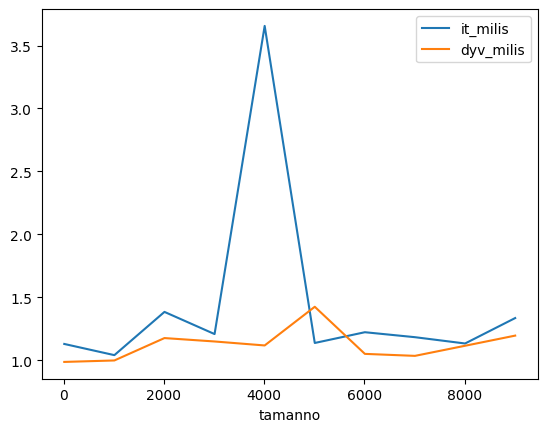

In [ ]:
df.plot()